In [2]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv(r"C:\Users\madas\Downloads\student_data.csv")
df

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
0,1141,A,male,73.47,64.0,81,87.0,60,74.0,71.0,60.0
1,1142,A,female,71.22,57.0,50,51.0,51,55.0,62.0,61.0
2,1143,A,female,74.56,47.0,48,71.0,60,161.0,68.0,64.0
3,1144,A,female,72.89,46.0,72,38.0,60,29.0,54.0,51.0
4,1145,A,female,70.11,49.0,45,63.0,60,66.0,66.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
100,1241,A,female,88.34,87.0,83,92.0,98,93.0,86.0,90.0
101,1242,B,male,89.84,98.0,77,95.0,98,96.0,88.0,100.0
102,1243,B,male,88.82,83.0,80,91.0,98,93.0,95.0,71.0
103,1244,A,male,86.60,92.0,82,91.0,99,94.0,82.0,78.0


## Clean the data for above dataset.

### Missing Data 

In [25]:
df.isna().sum()

ID                     0
class                  3
gender                 4
GPA                    2
Algebra                3
Calculus1              0
Calculus2              7
Statistics             0
Probability            4
Measure                7
Functional_analysis    5
dtype: int64

### filling methods

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
df['class'].fillna(method = 'ffill',inplace = True)

In [33]:
df['gender'].fillna(method = 'ffill',inplace = True)

In [35]:
df['GPA'].fillna(method = 'bfill',inplace = True)

In [36]:
df['Algebra'].fillna(method = 'bfill',inplace = True)

In [37]:
df['Calculus2'].fillna(method = 'bfill',inplace = True)

In [38]:
df['Probability'].fillna(method = 'ffill',inplace = True)

In [39]:
df['Measure'].fillna(method = 'ffill',inplace = True)

In [40]:
df['Functional_analysis'].fillna(method = 'ffill',inplace = True)

In [41]:
df.isna().sum()

ID                     0
class                  0
gender                 0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
dtype: int64

### Duplicates

In [43]:
df.duplicated().sum()

0

In [45]:
df.drop_duplicates(keep = 'first',inplace = True)

In [46]:
df.duplicated().sum()

0

### outliers

In [48]:
df.head(3)

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
0,1141,A,male,73.47,64.0,81,87.0,60,74.0,71.0,60.0
1,1142,A,female,71.22,57.0,50,51.0,51,55.0,62.0,61.0
2,1143,A,female,74.56,47.0,48,71.0,60,161.0,68.0,64.0


In [49]:
q1 = df['GPA'].quantile(0.25)

In [50]:
q3 = df['GPA'].quantile(0.75)

In [52]:
IQR = q3 - q1
Lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

In [54]:
df[(df['GPA'] < Lower)|(df['GPA'] > upper)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
5,1146,A,male,65.04,60.0,60,39.0,61,65.0,74.0,60.0
7,1148,A,female,64.75,60.0,38,60.0,63,70.0,68.0,51.0
58,1199,B,female,188.35,193.0,71,85.0,88,91.0,92.0,86.0
78,1219,A,male,63.49,81.0,61,17.0,92,88.0,69.0,9.0
99,1240,B,male,188.10,87.0,70,95.0,97,91.0,93.0,82.0


In [63]:
df[(df['GPA'] < 0)|(df['GPA'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
58,1199,B,female,188.35,193.0,71,85.0,88,91.0,92.0,86.0
99,1240,B,male,188.10,87.0,70,95.0,97,91.0,93.0,82.0


In [65]:
cond = (df['GPA'] < 0)|(df['GPA'] > 100)

In [66]:
df['GPA'] = np.where(cond,(65.04),df['GPA'])

In [67]:
df[(df['GPA'] < 0)|(df['GPA'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


In [68]:
df[(df['Algebra'] < 0)|(df['Algebra'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
58,1199,B,female,65.04,193.0,71,85.0,88,91.0,92.0,86.0


In [71]:
cond = (df['Algebra'] < 0)|(df['Algebra'] > 100)
df['Algebra'] = np.where(cond,87.0,df['Algebra'])
df[(df['Algebra'] < 0)|(df['Algebra'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


In [72]:
df[(df['Calculus1'] < 0)|(df['Calculus1'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


In [73]:
df[(df['Calculus2'] < 0)|(df['Calculus2'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
95,1236,A,female,87.63,82.0,81,-23.0,97,88.0,91.0,68.0


In [74]:
cond = (df['Calculus2'] < 0)|(df['Calculus2'] > 100)
df['Calculus2'] = np.where(cond,85.0,df['Calculus2'])
df[(df['Calculus2'] < 0)|(df['Calculus2'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


In [75]:
df[(df['Statistics'] < 0)|(df['Statistics'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
27,1168,A,female,83.06,68.0,72,71.0,801,86.0,81.0,64.0
57,1198,B,female,85.72,75.0,80,64.0,888,86.0,86.0,69.0
104,1245,A,male,93.71,93.0,97,99.0,-56,197.0,90.0,90.0


In [76]:
cond = (df['Statistics'] < 0)|(df['Statistics'] > 100)
df['Statistics'] = np.where(cond,97,df['Statistics'])
df[(df['Statistics'] < 0)|(df['Statistics'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


In [77]:
df[(df['Probability'] < 0)|(df['Probability'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
2,1143,A,female,74.56,47.0,48,71.0,60,161.0,68.0,64.0
8,1149,B,female,77.92,61.0,60,60.0,68,1800.0,78.0,71.0
104,1245,A,male,93.71,93.0,97,99.0,97,197.0,90.0,90.0


In [78]:
cond = (df['Probability'] < 0)|(df['Probability'] > 100)
df['Probability'] = np.where(cond,86.0,df['Probability'])
df[(df['Probability'] < 0)|(df['Probability'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


In [79]:
df[(df['Measure'] < 0)|(df['Measure'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
97,1238,A,male,91.14,98.0,90,98.0,97,83.0,193.0,89.0


In [80]:
cond = (df['Measure'] < 0)|(df['Measure'] > 100)
df['Measure'] = np.where(cond,90.0,df['Measure'])
df[(df['Measure'] < 0)|(df['Measure'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


In [81]:
df[(df['Functional_analysis'] < 0)|(df['Functional_analysis'] > 100)]

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis


### Transformation

In [105]:
import matplotlib.pyplot as plt

<Axes: ylabel='Density'>

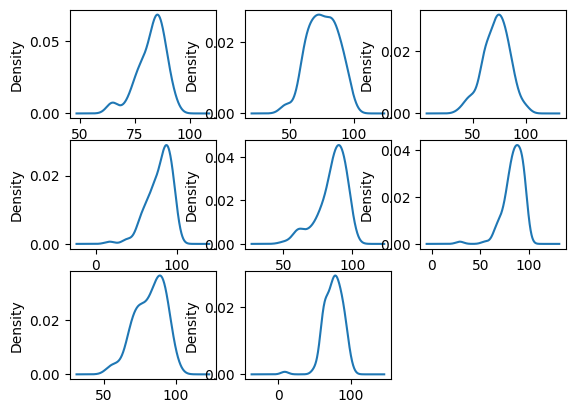

In [124]:
plt.subplot(331)
df["GPA"].plot(kind = 'density')

plt.subplot(332)
df['Algebra'].plot(kind = 'density')

plt.subplot(333)
df["Calculus1"].plot(kind = 'density')

plt.subplot(334)
df["Calculus2"].plot(kind = 'density')

plt.subplot(335)
df["Statistics"].plot(kind = 'density')

plt.subplot(336)
df["Probability"].plot(kind = 'density')

plt.subplot(337)
df["Measure"].plot(kind = 'density')

plt.subplot(338)
df["Functional_analysis"].plot(kind = 'density')


In [84]:
df['GPA'].mean(),df['GPA'].median()

(82.49095238095238, 84.01)

<Axes: ylabel='Density'>

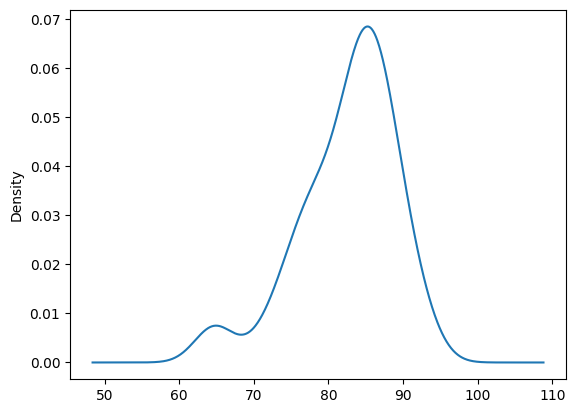

In [83]:
df['GPA'].plot(kind = 'density')

In [87]:
df['Algebra'].mean(),df['Algebra'].median()

(75.88571428571429, 76.0)

<Axes: ylabel='Density'>

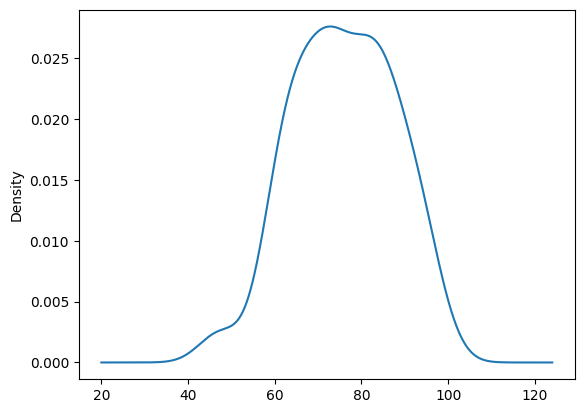

In [88]:
df['Algebra'].plot(kind = 'density')

In [89]:
df['Calculus1'].mean(),df['Calculus1'].median()

(71.96190476190476, 73.0)

<Axes: ylabel='Density'>

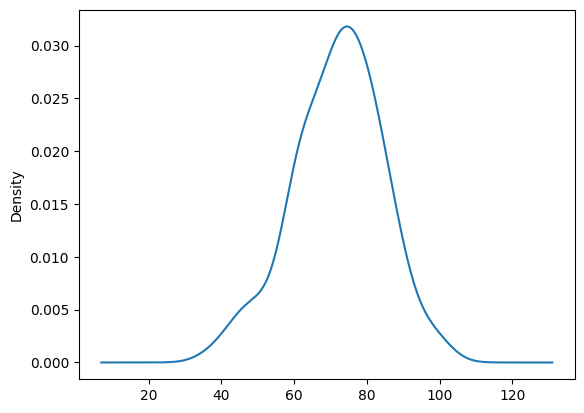

In [90]:
df['Calculus1'].plot(kind = 'density')

In [91]:
df['Calculus2'].mean(),df['Calculus2'].median()

(78.46666666666667, 83.0)

<Axes: ylabel='Density'>

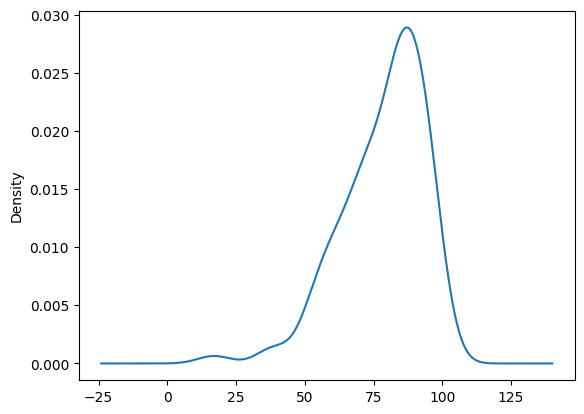

In [92]:
df['Calculus2'].plot(kind = 'density')

In [93]:
df['Statistics'].mean(),df['Statistics'].median()

(85.34285714285714, 87.0)

<Axes: ylabel='Density'>

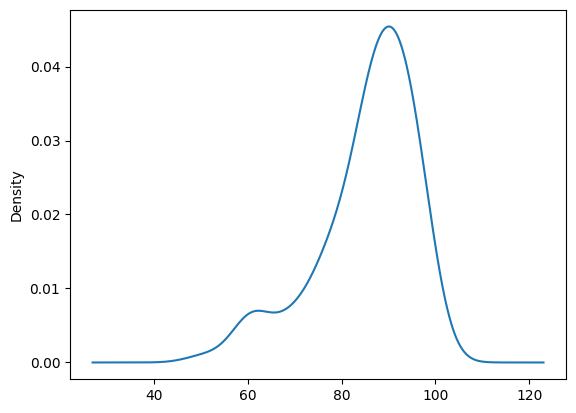

In [94]:
df['Statistics'].plot(kind = 'density')

In [95]:
df['Probability'].mean(),df['Probability'].mean()

(84.18095238095238, 84.18095238095238)

<Axes: ylabel='Density'>

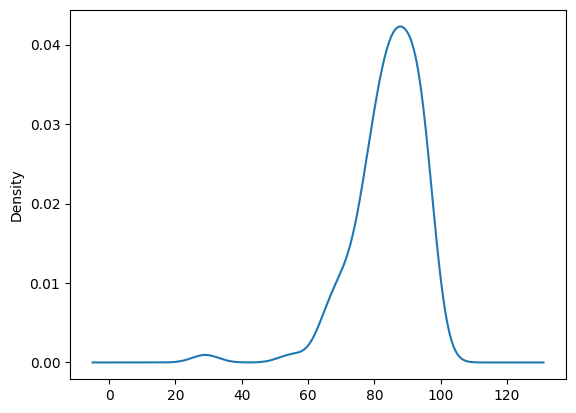

In [97]:
df['Probability'].plot(kind = 'density')

In [98]:
df['Measure'].mean(),df['Measure'].median()

(81.96190476190476, 83.0)

<Axes: ylabel='Density'>

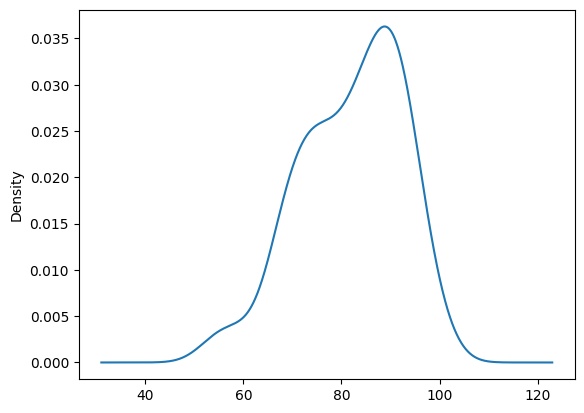

In [99]:
df['Measure'].plot(kind = 'density')

In [100]:
df['Functional_analysis'].mean(),df['Functional_analysis'].median()

(75.93333333333334, 78.0)

<Axes: ylabel='Density'>

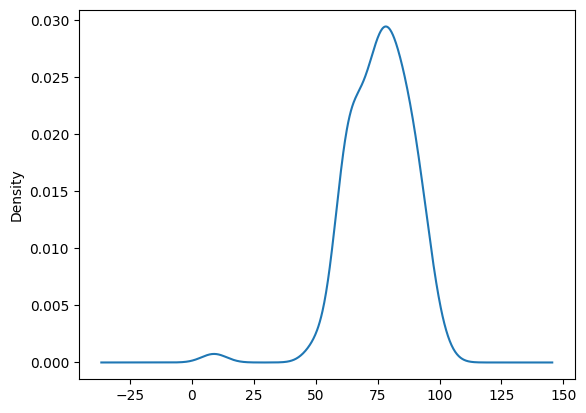

In [104]:
df['Functional_analysis'].plot(kind = 'density')

### Type casting

In [127]:
df['Functional_analysis'].dtype

dtype('float64')

In [129]:
df['Functional_analysis'] = df['Functional_analysis'].astype('float32')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   GPA                  105 non-null    float64
 4   Algebra              105 non-null    float64
 5   Calculus1            105 non-null    int64  
 6   Calculus2            105 non-null    float64
 7   Statistics           105 non-null    int64  
 8   Probability          105 non-null    float64
 9   Measure              105 non-null    float64
 10  Functional_analysis  105 non-null    float32
dtypes: float32(1), float64(5), int64(3), object(2)
memory usage: 8.7+ KB


### variance

In [132]:
df['Functional_analysis'].nunique()

35

In [133]:
df['GPA'].nunique()

99

In [134]:
df['Algebra'].nunique()

39

In [135]:
df['Probability'].nunique()

35

In [136]:
df['Calculus1'].nunique()

37

### Dummy variables

In [137]:
df.head(3)

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
0,1141,A,male,73.47,64.0,81,87.0,60,74.0,71.0,60.0
1,1142,A,female,71.22,57.0,50,51.0,51,55.0,62.0,61.0
2,1143,A,female,74.56,47.0,48,71.0,60,86.0,68.0,64.0


In [138]:
def gen(n):
    if n == 'male':
        return 0
    else:
        return 1

In [139]:
df['gender'] = df['gender'].apply(gen)

In [140]:
df.head(3)

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
0,1141,A,0,73.47,64.0,81,87.0,60,74.0,71.0,60.0
1,1142,A,1,71.22,57.0,50,51.0,51,55.0,62.0,61.0
2,1143,A,1,74.56,47.0,48,71.0,60,86.0,68.0,64.0


### Discretization

In [161]:
def GPA(n):
    if n != 50:
        return 'Pass'
    else:
        return 'Fail'

In [162]:
df['GPA'] = df['GPA'].apply(GPA)

In [163]:
df.head(3)

,ID,class,gender,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
0,1141,A,0,Pass,64.0,81,87.0,60,74.0,71.0,60.0
1,1142,A,1,Pass,57.0,50,51.0,51,55.0,62.0,61.0
2,1143,A,1,Pass,47.0,48,71.0,60,86.0,68.0,64.0


### scaling

In [168]:
#Normalization
def norm(x):
    n = (x - x.min())/(x.max() - x.min())
    return n

In [169]:
norm(df['Algebra'])

0      0.346154
1      0.211538
2      0.019231
3      0.000000
4      0.057692
         ...   
100    0.788462
101    1.000000
102    0.711538
103    0.884615
104    0.903846
Name: Algebra, Length: 105, dtype: float64

In [171]:
sum(norm(df['Algebra'])>1),sum(norm(df['Algebra'])<-1)

(0, 0)

In [172]:
#standard
def stnd(x):
    n = (x - x.mean())/(x.std())
    return n

In [173]:
stnd(df['Algebra'])

0     -1.016085
1     -1.614500
2     -2.469379
3     -2.554867
4     -2.298403
         ...   
100    0.950137
101    1.890504
102    0.608185
103    1.377576
104    1.463064
Name: Algebra, Length: 105, dtype: float64

In [174]:
sum(stnd(df['Algebra'])>3),sum(stnd(df['Algebra'])<-3)

(0, 0)